<a href="https://colab.research.google.com/github/feranzie/NLP-analysis-of-books/blob/main/The_House_on_the_Borderland_books_analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from pprint import pprint
from collections import Counter
# from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import ngrams, FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

import re
from gensim.summarization import summarize
from gensim.summarization import keywords
import spacy
import seaborn as sns
##print "all imports worked nicely"
import string

In [ ]:
# opening the text file and reading it's contents and removing empty lines.
txt=[]
with open("/content/10002.txt","r") as f:
 for i in f.readlines():
       if not i.strip():
           continue
       if i:
         txt.append(i)

In [ ]:
txt

In [ ]:
text = ''.join(str(e) for e in txt)

In [ ]:
z=(text.replace('_I_', 'CHAPTER ').replace('_II_', 'CHAPTER ').replace('_III_', 'CHAPTER ').replace('_IV_', 'CHAPTER ').replace('_V_', 'CHAPTER ').replace('_VI_', 'CHAPTER ').replace('_VII_', 'CHAPTER ').replace('_VIII_', 'CHAPTER ').replace('_IX_', 'CHAPTER ').replace('_IX_', 'CHAPTER ').replace('_X_', 'CHAPTER ').replace('_XI_', 'CHAPTER ').replace('_XII_', 'CHAPTER ').replace('_XIII_', 'CHAPTER ').replace('_XIV_', 'CHAPTER ').replace('_XV_', 'CHAPTER ').replace('_XVI_', 'CHAPTER ').replace('_XVII_', 'CHAPTER ').replace('_XVIII_', 'CHAPTER ').replace('_XIX_', 'CHAPTER ').replace('_XX_', 'CHAPTER ').replace('_XXI_', 'CHAPTER ').replace('_XXII_', 'CHAPTER ').replace('_XXIII_', 'CHAPTER ').replace('_XXIV_', 'CHAPTER ').replace('_XXV_', 'CHAPTER ').replace('_XXVI_', 'CHAPTER ').replace('_XXVII_', 'CHAPTER '))

In [ ]:
#z=(text.replace('_I_', 'CHAPTER I').replace('_II_', 'CHAPTER II').replace('_III_', 'CHAPTER III').replace('_IV_', 'CHAPTER IV').replace('_V_', 'CHAPTER V').replace('_VI_', 'CHAPTER VI').replace('_VII_', 'CHAPTER VIi').replace('_VIII_', 'CHAPTER VIII').replace('_IX_', 'CHAPTER IX').replace('_IX_', 'CHAPTER IX').replace('_X_', 'CHAPTER X').replace('_XI_', 'CHAPTER xi').replace('_XII_', 'CHAPTER IXII').replace('_XIII_', 'CHAPTER XIII').replace('_XIV_', 'CHAPTER XIV').replace('_XV_', 'CHAPTER XV').replace('_XVI_', 'CHAPTER XVI').replace('_XVII_', 'CHAPTER XVII').replace('_XVIII_', 'CHAPTER XVIII').replace('_XIX_', 'CHAPTER xIX').replace('_XX_', 'CHAPTER XX').replace('_XXI_', 'CHAPTER XXI').replace('_XXII_', 'CHAPTER XXII').replace('_XXIII_', 'CHAPTER XXIII').replace('_XXIV_', 'CHAPTER XXIV').replace('_XXV_', 'CHAPTER XXV').replace('_XXVI_', 'CHAPTER XXVI').replace('_XXVII_', 'CHAPTER XXVII'))

In [ ]:
z

'Project Gutenberg\'s The House on the Borderland, by William Hope Hodgson\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\nTitle: The House on the Borderland\nAuthor: William Hope Hodgson\nRelease Date: November 10, 2003 [EBook #10002]\nLast updated: January 19, 2009\nLanguage: English\nCharacter set encoding: ASCII\n*** START OF THIS PROJECT GUTENBERG EBOOK THE HOUSE ON THE BORDERLAND ***\nProduced by Suzanne Shell, Sjaani and PG Distributed Proofreaders\nTHE HOUSE ON THE BORDERLAND\nWilliam Hope Hodgson\n_From the Manuscript discovered in 1877 by Messrs. Tonnison and\nBerreggnog in the Ruins that lie to the South of the Village of\nKraighten, in the West of Ireland. Set out here, with Notes_.\nTO MY FATHER\n_(Whose feet tread the lost aeons)_\nOpen the door,\n  And listen!\nOnly th

In [ ]:
import re
chapters = re.split("Chapter ", z, flags = re.IGNORECASE) #Finds all the chapter markers in the book and makes a list of all the chapters
chapters.pop(0) # Removes the first item in list as this is ""
for i in range(1, len(chapters)+1): #Loops for the number of chapters in the book, starting at chapter 1
    writeBook = open("{}.txt".format(i), "w+") #Opens a book with the name of i, if it does not exist, it creates one
    writeBook.write(chapters[i-1]) #Overwrites what is written in the book with the same chapter in the list

In [ ]:
chap=chapters[0:27]

In [ ]:
number=[]
for i in chap:
 number.append(chap.index(i))

In [ ]:
no = [x+1 for x in number]

In [ ]:
df = pd.DataFrame(
    {'chapter': no,
     'content': chap,
    })

In [ ]:
df

,chapter,content
0,1,\nTHE FINDING OF THE MANUSCRIPT\nRight away in...
1,2,\nTHE PLAIN OF SILENCE\nI am an old man. I liv...
2,3,"\nTHE HOUSE IN THE ARENA\nAnd so, after a time..."
3,4,"\nTHE EARTH\nThus I was, and only the memory t..."
4,5,"\nTHE THING IN THE PIT\nThis house is, as I ha..."
5,6,"\nTHE SWINE-THINGS\nIt was evening, a week lat..."
6,7,"\nTHE ATTACK\nI spent some time, puzzling how ..."
7,8,\nAFTER THE ATTACK\nIt was now about three a.m...
8,9,"\nIN THE CELLARS\nAt last, what with being tir..."
9,10,"\nTHE TIME OF WAITING\nThe sun was now warm, a..."


# Lower case word

In [ ]:
df['cleaned']=df['content'].apply(lambda x: x.lower())

# Remove digits and words containing digits

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\n','', x))

# Remove Punctuations

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
df.head()

,chapter,content,cleaned
0,1,\nTHE FINDING OF THE MANUSCRIPT\nRight away in...,the finding of the manuscriptright away in the...
1,2,\nTHE PLAIN OF SILENCE\nI am an old man. I liv...,the plain of silencei am an old man. i live he...
2,3,"\nTHE HOUSE IN THE ARENA\nAnd so, after a time...","the house in the arenaand so, after a time, i ..."
3,4,"\nTHE EARTH\nThus I was, and only the memory t...","the earththus i was, and only the memory that ..."
4,5,"\nTHE THING IN THE PIT\nThis house is, as I ha...","the thing in the pitthis house is, as i have s..."


In [ ]:
df = df.dropna(axis = 0, how = 'all')

In [ ]:
len(df['cleaned'])

27

In [ ]:
word_count = np.zeros(27)
chapter = 0

for text in df['cleaned']:
    count = text.split()
    word_count[chapter] = len(count)
    chapter = chapter + 1

# getting word count for individual chapters
print (word_count)


[3462. 1681. 1789.  938. 2023. 3034. 1734. 1480. 1141.  970. 2051. 3313.
 1393. 1168. 3133. 1549. 1660. 2004. 1282.  962. 1383. 1381.  259. 1110.
 2707.  646. 1585.]


In [ ]:
df['WordCount'] = word_count.tolist()

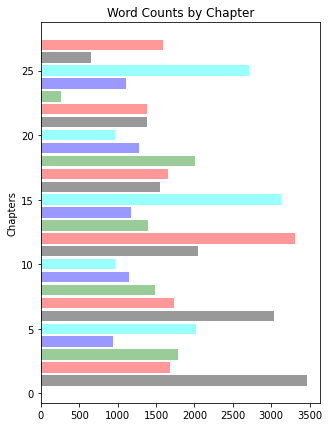

,chapter,content,cleaned,WordCount
0,1,\nTHE FINDING OF THE MANUSCRIPT\nRight away in...,the finding of the manuscriptright away in the...,3462.0
1,2,\nTHE PLAIN OF SILENCE\nI am an old man. I liv...,the plain of silencei am an old man. i live he...,1681.0
2,3,"\nTHE HOUSE IN THE ARENA\nAnd so, after a time...","the house in the arenaand so, after a time, i ...",1789.0
3,4,"\nTHE EARTH\nThus I was, and only the memory t...","the earththus i was, and only the memory that ...",938.0
4,5,"\nTHE THING IN THE PIT\nThis house is, as I ha...","the thing in the pitthis house is, as i have s...",2023.0
5,6,"\nTHE SWINE-THINGS\nIt was evening, a week lat...","the swine-thingsit was evening, a week later. ...",3034.0
6,7,"\nTHE ATTACK\nI spent some time, puzzling how ...","the attacki spent some time, puzzling how to s...",1734.0
7,8,\nAFTER THE ATTACK\nIt was now about three a.m...,"after the attackit was now about three a.m., a...",1480.0
8,9,"\nIN THE CELLARS\nAt last, what with being tir...","in the cellarsat last, what with being tired a...",1141.0
9,10,"\nTHE TIME OF WAITING\nThe sun was now warm, a...","the time of waitingthe sun was now warm, and s...",970.0


In [ ]:
# import matplotlib as mpl
# # Just making the plots look better
# mpl.style.use('ggplot')

my_colors = 'rgbkymc'

plt.figure(figsize=(5,7))
# plt.rcParams["figure.figsize"] = [16,9]
plt.ylabel('Chapters')
plt.title('Word Counts by Chapter')

# plt.bar(df.WordCount, df.ChapterName)
opacity = 0.4

plt.barh(df.chapter, df.WordCount, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
# plt.barh(df.ChapterName, df.WordCount, color= my_colors)

plt.show()


# df = df.drop('wordCount', 1)


df.head(30)


In [ ]:
#create list of strings for numbering below graph
g=list(range(1, 28))
q=[]
for i in g:
  q.append(str(i))


In [ ]:
# WordClouds - show most frequently occuring words, with higher frequency words corelating to high font size
# generating wordCloud showing the most frequently occurring words per Chapter 
color_flag = True
chapter_count = 0
for text in df['cleaned']:
    if color_flag:
        wordcloud = WordCloud(stopwords=stop_words).generate(text)
    else:
        wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    # Display the generated image:
    plt.title("WordCloud Chapter " + (q)[chapter_count])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    color_flag = not color_flag
    chapter_count = chapter_count + 1


# Phrase distribution

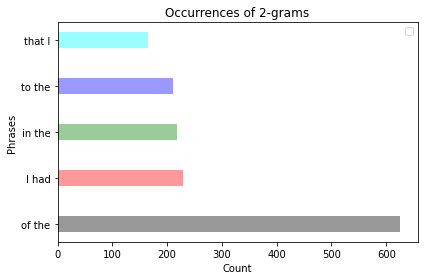

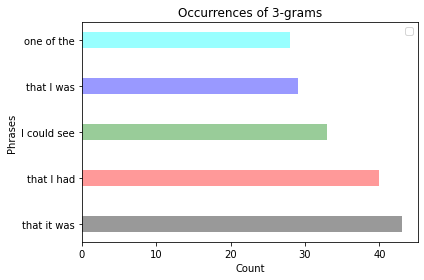

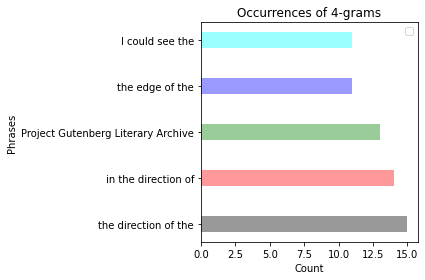

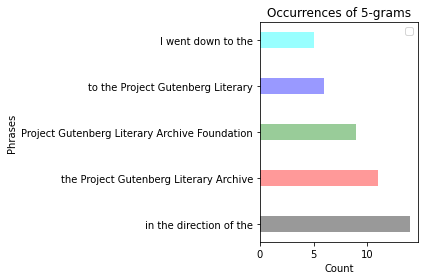

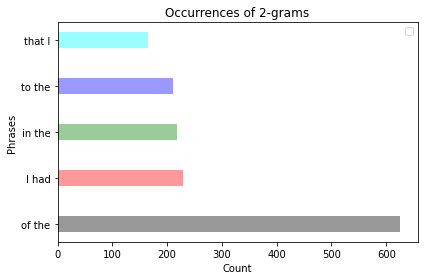

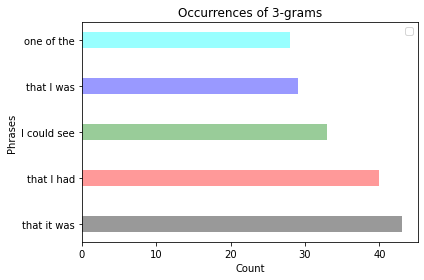

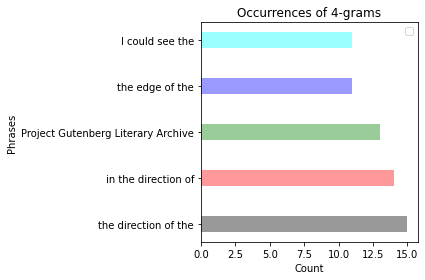

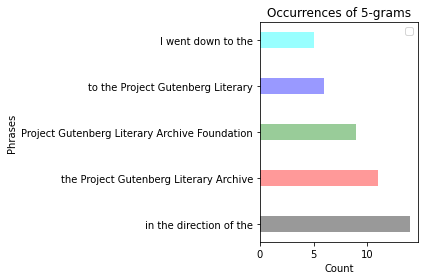

In [ ]:
# data = df['cleaned'][0]

# Phrase distribution(s) throughout the whole book
data = ''.join(z)
all_counts = dict()
# counting till n-grams, n ranging from 2..5 
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    fig, ax = plt.subplots()

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()

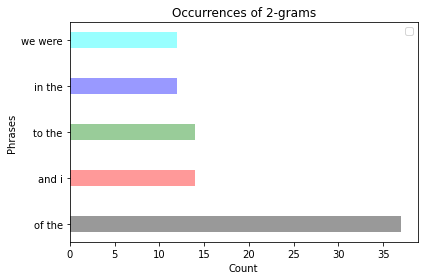

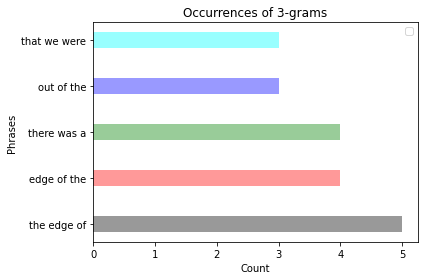

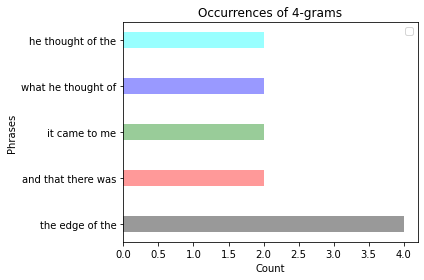

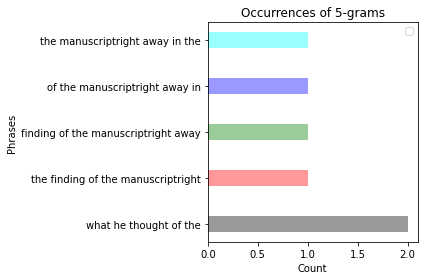

In [ ]:

# Phrase distribution(s) throughout individual Chapters, eg. Chapter 1 
data = df['cleaned'][0]
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes 
 #formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

#tokenize
%time tokenized_text = [tokenize_and_stopWordsRemoval(text) for text in txt]


CPU times: user 1.08 s, sys: 1.76 ms, total: 1.09 s
Wall time: 1.1 s


In [ ]:
print (len(tokenized_text))
print (tokenized_text[41])
print (book[41])

4737
['And', 'MS.', 'You', 'must', 'picture', 'first', 'given']
and the ms itselfyou must picture me when first it was given into my


# Name and Place Identification

In [ ]:

import spacy
nlp = spacy.load("en_core_web_sm")

doc_str = ""
for item in tokenized_text:
    doc_str = doc_str + " " + " ".join(item)
doc = nlp(doc_str)   
print (type(doc))

list_person = []
list_place = []

for X in doc.ents:
    if (X.label_ == u'PERSON'):
        list_person.append((X.text, X.label_))
    elif (X.label_ == u'GPE')| (X.label_ == u'LOC') :
        list_place.append((X.text, X.label_))

# Set operation on lists to remove the duplicate entries
list_person = list(set(list_person))
list_place = list(set(list_place))

#printing first 10 items in each category
print (list_person[:10])
print (list_place[:10])

AttributeError: ignored